In [33]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [35]:
# Load Coca-Cola Stock History (Daily Price Data)
history_path = "/content/Coca-Cola_stock_history.csv"
df_history = pd.read_csv(history_path)

# Load Coca-Cola Stock Info (Fundamental Information)
info_path = "/content/Coca-Cola_stock_info.csv"
df_info = pd.read_csv(info_path, header=None, names=['Description', 'Information'])

# Display quick confirmation
print("History Data Shape:", df_history.shape)
print("Info Data Shape:", df_info.shape)


df_history.head()


History Data Shape: (15311, 8)
Info Data Shape: (154, 2)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [36]:
# Basic exploration of the stock history data
print("----- DATA TYPES & NULL CHECK -----")
df_history.info()

print("\n----- FIRST 10 ROWS -----")
display(df_history.head(10))

print("\n----- SUMMARY STATISTICS -----")
display(df_history.describe())


----- DATA TYPES & NULL CHECK -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB

----- FIRST 10 ROWS -----


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0
5,1962-01-09,0.047664,0.048778,0.047292,0.048530,960000,0.0,0
6,1962-01-10,0.048530,0.049459,0.048035,0.048778,1612800,0.0,0
7,1962-01-11,0.048778,0.049273,0.048530,0.049273,614400,0.0,0
8,1962-01-12,0.049273,0.049273,0.048406,0.048902,883200,0.0,0
9,1962-01-15,0.048778,0.048778,0.048283,0.048406,614400,0.0,0



----- SUMMARY STATISTICS -----


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [38]:
df_history.isna().sum().sum()

np.int64(0)

In [39]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


In [40]:
# Convert Date column to datetime format
df_history['Date'] = pd.to_datetime(df_history['Date'], errors='coerce')

# Sort the data by date to ensure proper time-series order
df_history = df_history.sort_values(by='Date').reset_index(drop=True)

# Verify conversion
print(df_history.info())
df_history.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6471 non-null   datetime64[ns]
 1   Open          15311 non-null  float64       
 2   High          15311 non-null  float64       
 3   Low           15311 non-null  float64       
 4   Close         15311 non-null  float64       
 5   Volume        15311 non-null  int64         
 6   Dividends     15311 non-null  float64       
 7   Stock Splits  15311 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 957.1 KB
None


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [41]:
# Check for duplicate rows
duplicates = df_history.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df_history = df_history.drop_duplicates()
    print("Duplicates removed. New shape:", df_history.shape)
else:
    print("No duplicates found. Dataset is clean.")


Number of duplicate rows: 0
No duplicates found. Dataset is clean.


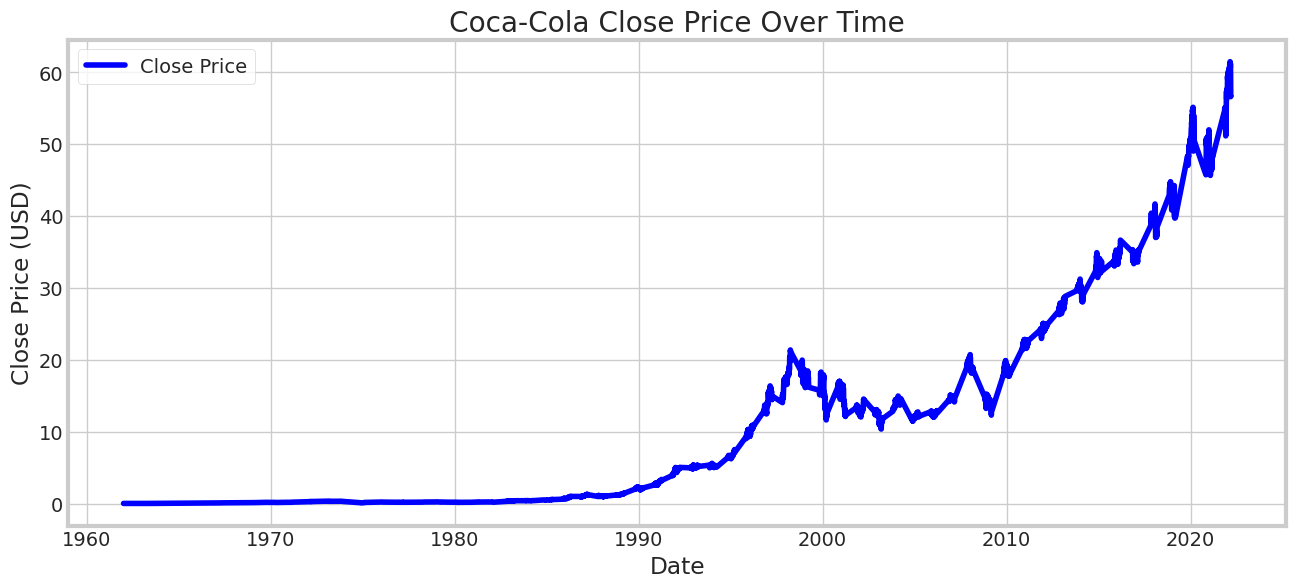

In [42]:
# Plot the Close price over time
plt.figure(figsize=(14,6))
plt.plot(df_history['Date'], df_history['Close'], label='Close Price', color='blue')
plt.title("Coca-Cola Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()


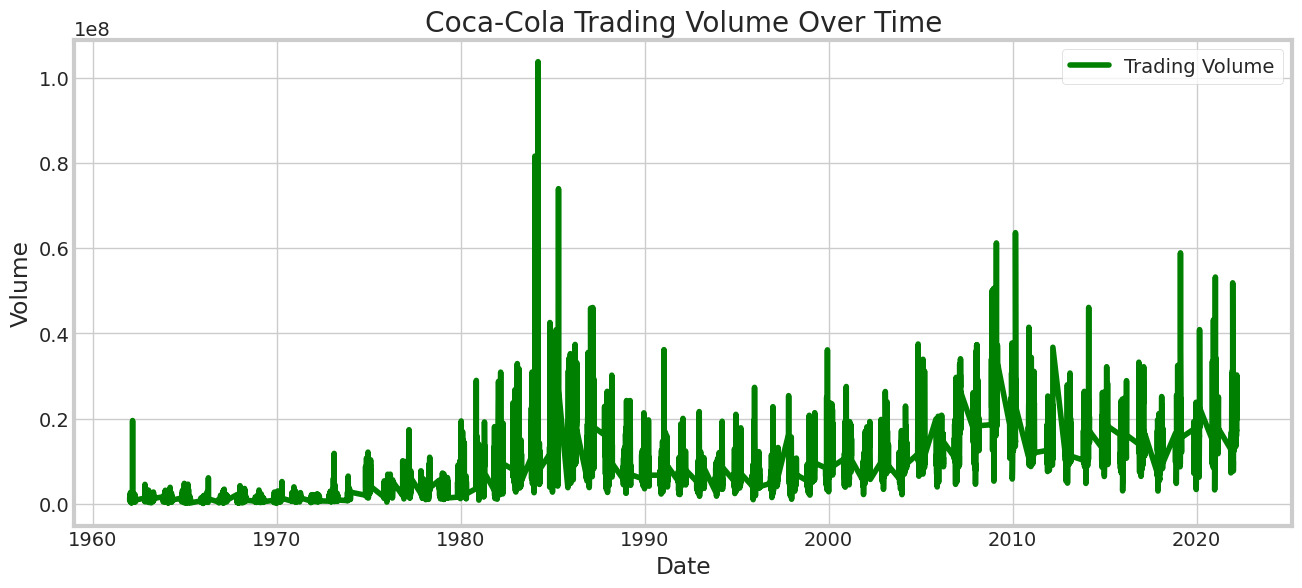

In [43]:
# Plot Volume over time
plt.figure(figsize=(14,6))
plt.plot(df_history['Date'], df_history['Volume'], label='Trading Volume', color='green')
plt.title("Coca-Cola Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


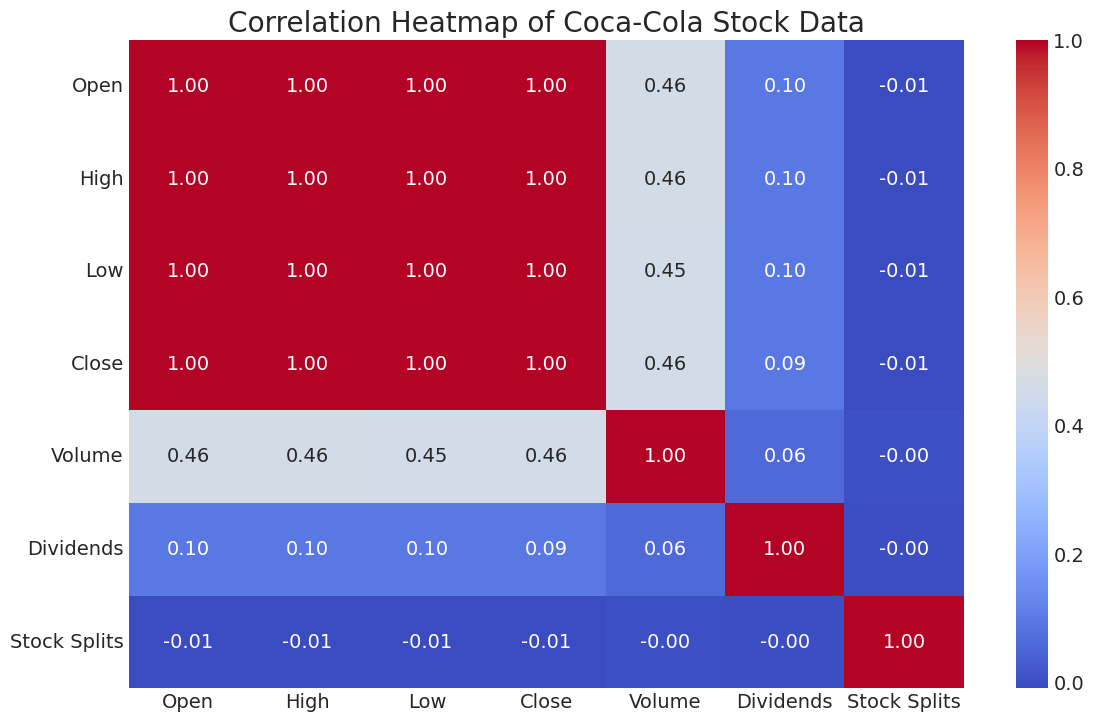

In [44]:
# Select only numeric columns for correlation
numeric_df = df_history.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Coca-Cola Stock Data")
plt.show()


In [46]:
# Moving Averages (Trend Indicators)
df_history['MA_20'] = df_history['Close'].rolling(window=20).mean()
df_history['MA_50'] = df_history['Close'].rolling(window=50).mean()

# Display to confirm
df_history[['Date', 'Close', 'MA_20', 'MA_50']].head(50)


,Date,Close,MA_20,MA_50
0,1962-01-02,0.050016,NaN,NaN
1,1962-01-03,0.048902,NaN,NaN
2,1962-01-04,0.049273,NaN,NaN
3,1962-01-05,0.048159,NaN,NaN
4,1962-01-08,0.047664,NaN,NaN
5,1962-01-09,0.048530,NaN,NaN
6,1962-01-10,0.048778,NaN,NaN
7,1962-01-11,0.049273,NaN,NaN
8,1962-01-12,0.048902,NaN,NaN
9,1962-01-15,0.048406,NaN,NaN


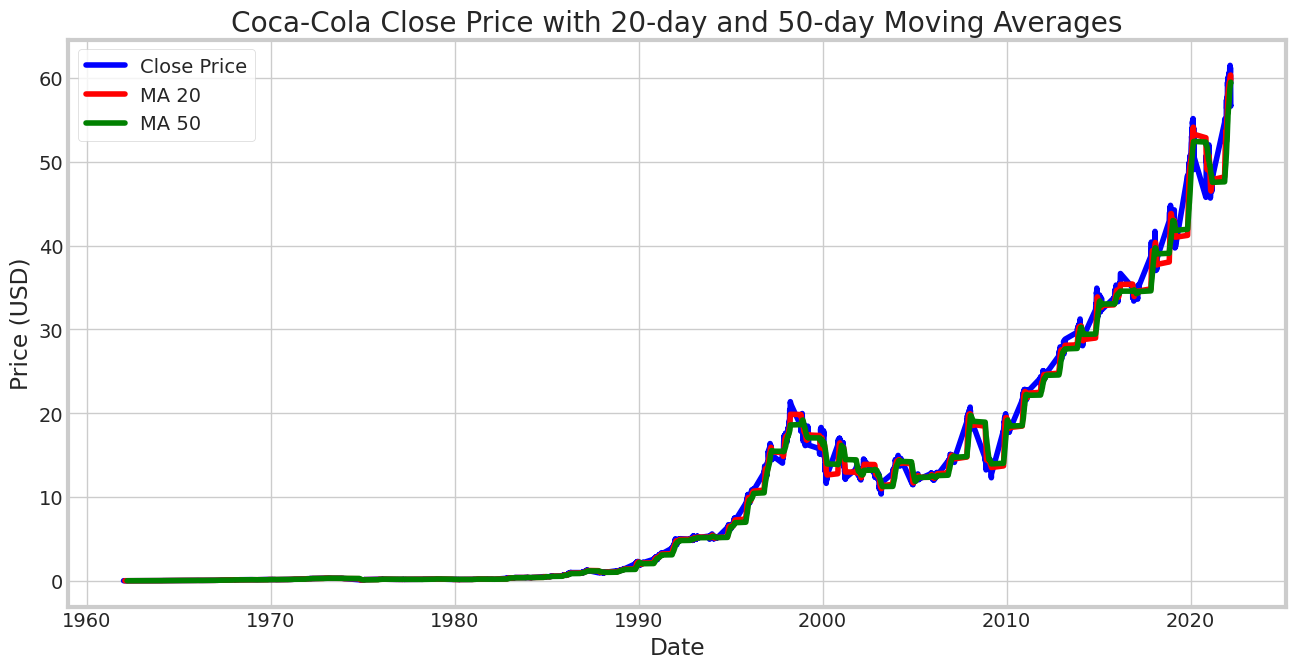

In [47]:
plt.figure(figsize=(14,7))

# Plot close price
plt.plot(df_history['Date'], df_history['Close'], label='Close Price', color='blue')

# Plot MA20
plt.plot(df_history['Date'], df_history['MA_20'], label='MA 20', color='red')

# Plot MA50
plt.plot(df_history['Date'], df_history['MA_50'], label='MA 50', color='green')

plt.title("Coca-Cola Close Price with 20-day and 50-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [48]:
# Create Daily Return (percentage change)
df_history['Daily_Return'] = df_history['Close'].pct_change()

# Show first few values
df_history[['Date', 'Close', 'Daily_Return']].head(10)


,Date,Close,Daily_Return
0,1962-01-02,0.050016,NaN
1,1962-01-03,0.048902,-0.022280
2,1962-01-04,0.049273,0.007598
3,1962-01-05,0.048159,-0.022616
4,1962-01-08,0.047664,-0.010282
5,1962-01-09,0.048530,0.018181
6,1962-01-10,0.048778,0.005101
7,1962-01-11,0.049273,0.010156
8,1962-01-12,0.048902,-0.007541
9,1962-01-15,0.048406,-0.010126


In [49]:
# Volatility using 20-day rolling standard deviation
df_history['Volatility'] = df_history['Daily_Return'].rolling(window=20).std()

# Display a few rows to verify
df_history[['Date', 'Daily_Return', 'Volatility']].head(30)


,Date,Daily_Return,Volatility
0,1962-01-02,NaN,NaN
1,1962-01-03,-0.022280,NaN
2,1962-01-04,0.007598,NaN
3,1962-01-05,-0.022616,NaN
4,1962-01-08,-0.010282,NaN
5,1962-01-09,0.018181,NaN
6,1962-01-10,0.005101,NaN
7,1962-01-11,0.010156,NaN
8,1962-01-12,-0.007541,NaN
9,1962-01-15,-0.010126,NaN


In [50]:
# Select features and target for ML model
features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

# Drop rows with NaN (from moving averages & volatility)
df_model = df_history.dropna()

X = df_model[features]
y = df_model[target]

# Check shapes
X.shape, y.shape


((6422, 8), (6422,))

In [51]:
# Time-series split: no shuffle
train_size = int(len(df_model) * 0.80)  # 80% train, 20% test

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5137, 8), (1285, 8), (5137,), (1285,))

In [52]:
# Train the Random Forest model
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [53]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


Model Evaluation Results:
MAE : 12.8526
MSE : 295.7608
R²  : -0.9333


Coca-Cola stock price changed dramatically over decades

Your dataset begins at 1962, where the stock price was around $0.05 (split-adjusted).

Today Coca-Cola trades near $60–$65.

That means:

➝ The model is trying to learn price behavior over 62 years.

Stock prices grow over decades, so a single ML model struggles to fit the entire range.

##Use last 10 years only

In [54]:
# Filter dataset to last 10 years
df_recent = df_model[df_model['Date'] >= '2013-01-01']

# Prepare new X and y
X = df_recent[features]
y = df_recent[target]

# Time-series split again
train_size = int(len(X) * 0.80)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

# Train Random Forest again
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("New Results (Last 10 Years Only):")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


New Results (Last 10 Years Only):
MAE : 1.7820
MSE : 7.6215
R²  : 0.6982


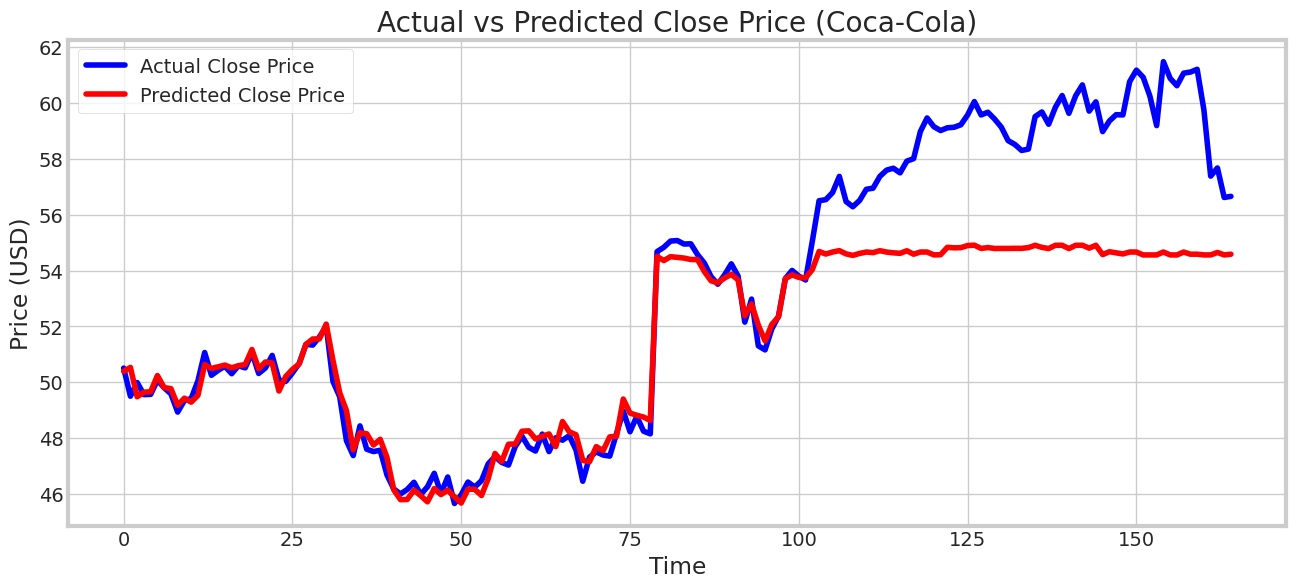

In [55]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual Close Price", color='blue')
plt.plot(y_pred, label="Predicted Close Price", color='red')
plt.title("Actual vs Predicted Close Price (Coca-Cola)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [56]:
!pip install yfinance
import yfinance as yf


In [57]:
# Fetch recent Coca-Cola (KO) stock data for live prediction
ticker = "KO"
data_live = yf.download(ticker, period="60d")  # last 60 days for rolling features
data_live.tail()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2025-11-25,72.103561,72.421329,71.636838,72.292239,17451200
2025-11-26,72.371674,72.580208,71.885093,72.093628,11795100
2025-11-28,72.610001,72.719234,72.252511,72.490835,7423000
2025-12-01,71.949997,72.910004,71.930000,72.599998,14388100
2025-12-02,70.669998,71.800003,70.430000,71.800003,19863200


In [58]:
# Prepare live data same as training data
data_live['MA_20'] = data_live['Close'].rolling(window=20).mean()
data_live['MA_50'] = data_live['Close'].rolling(window=50).mean()
data_live['Daily_Return'] = data_live['Close'].pct_change()
data_live['Volatility'] = data_live['Daily_Return'].rolling(window=20).std()

# Drop missing rows
data_live = data_live.dropna()

# Take the most recent row
latest = data_live.iloc[-1]

latest


,,2025-12-02
Price,Ticker,
Close,KO,7.067000e+01
High,KO,7.180000e+01
Low,KO,7.043000e+01
Open,KO,7.180000e+01
Volume,KO,1.986320e+07
MA_20,,7.073526e+01
MA_50,,6.863237e+01
Daily_Return,,-1.779012e-02
Volatility,,1.016034e-02


In [59]:
# Prepare features for prediction
X_live = pd.DataFrame({
    'Open': [latest['Open']],
    'High': [latest['High']],
    'Low':  [latest['Low']],
    'Volume': [latest['Volume']],
    'MA_20': [latest['MA_20']],
    'MA_50': [latest['MA_50']],
    'Daily_Return': [latest['Daily_Return']],
    'Volatility': [latest['Volatility']]
})



In [60]:
# Predict today's closing price
predicted_close = model.predict(X_live)[0]
print(f"Predicted Close Price for Today (KO): ${predicted_close:.2f}")


Predicted Close Price for Today (KO): $54.56


In [61]:
import yfinance as yf

# Fetch last 90 days of Coca-Cola (KO) stock data
dashboard_data = yf.download("KO", period="90d")
dashboard_data.tail()



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2025-11-25,72.103561,72.421329,71.636838,72.292239,17451200
2025-11-26,72.371674,72.580208,71.885093,72.093628,11795100
2025-11-28,72.610001,72.719234,72.252511,72.490835,7423000
2025-12-01,71.949997,72.910004,71.930000,72.599998,14388100
2025-12-02,70.669998,71.800003,70.430000,71.800003,19863200


In [62]:
# Create technical indicators for dashboard
dashboard_data['MA_20'] = dashboard_data['Close'].rolling(window=20).mean()
dashboard_data['MA_50'] = dashboard_data['Close'].rolling(window=50).mean()
dashboard_data['Daily_Return'] = dashboard_data['Close'].pct_change()
dashboard_data['Volatility'] = dashboard_data['Daily_Return'].rolling(window=20).std()

dashboard_data = dashboard_data.dropna()
latest_dash = dashboard_data.iloc[-1]  # most recent row

latest_dash


,,2025-12-02
Price,Ticker,
Close,KO,7.067000e+01
High,KO,7.180000e+01
Low,KO,7.043000e+01
Open,KO,7.180000e+01
Volume,KO,1.986320e+07
MA_20,,7.073526e+01
MA_50,,6.863237e+01
Daily_Return,,-1.779012e-02
Volatility,,1.016034e-02


In [63]:
X_dash = pd.DataFrame({
    'Open': [latest_dash['Open']],
    'High': [latest_dash['High']],
    'Low':  [latest_dash['Low']],
    'Volume': [latest_dash['Volume']],
    'MA_20': [latest_dash['MA_20']],
    'MA_50': [latest_dash['MA_50']],
    'Daily_Return': [latest_dash['Daily_Return']],
    'Volatility': [latest_dash['Volatility']]
})


In [64]:
predicted_live_price = model.predict(X_dash)[0]
predicted_live_price


np.float64(54.558642082149966)

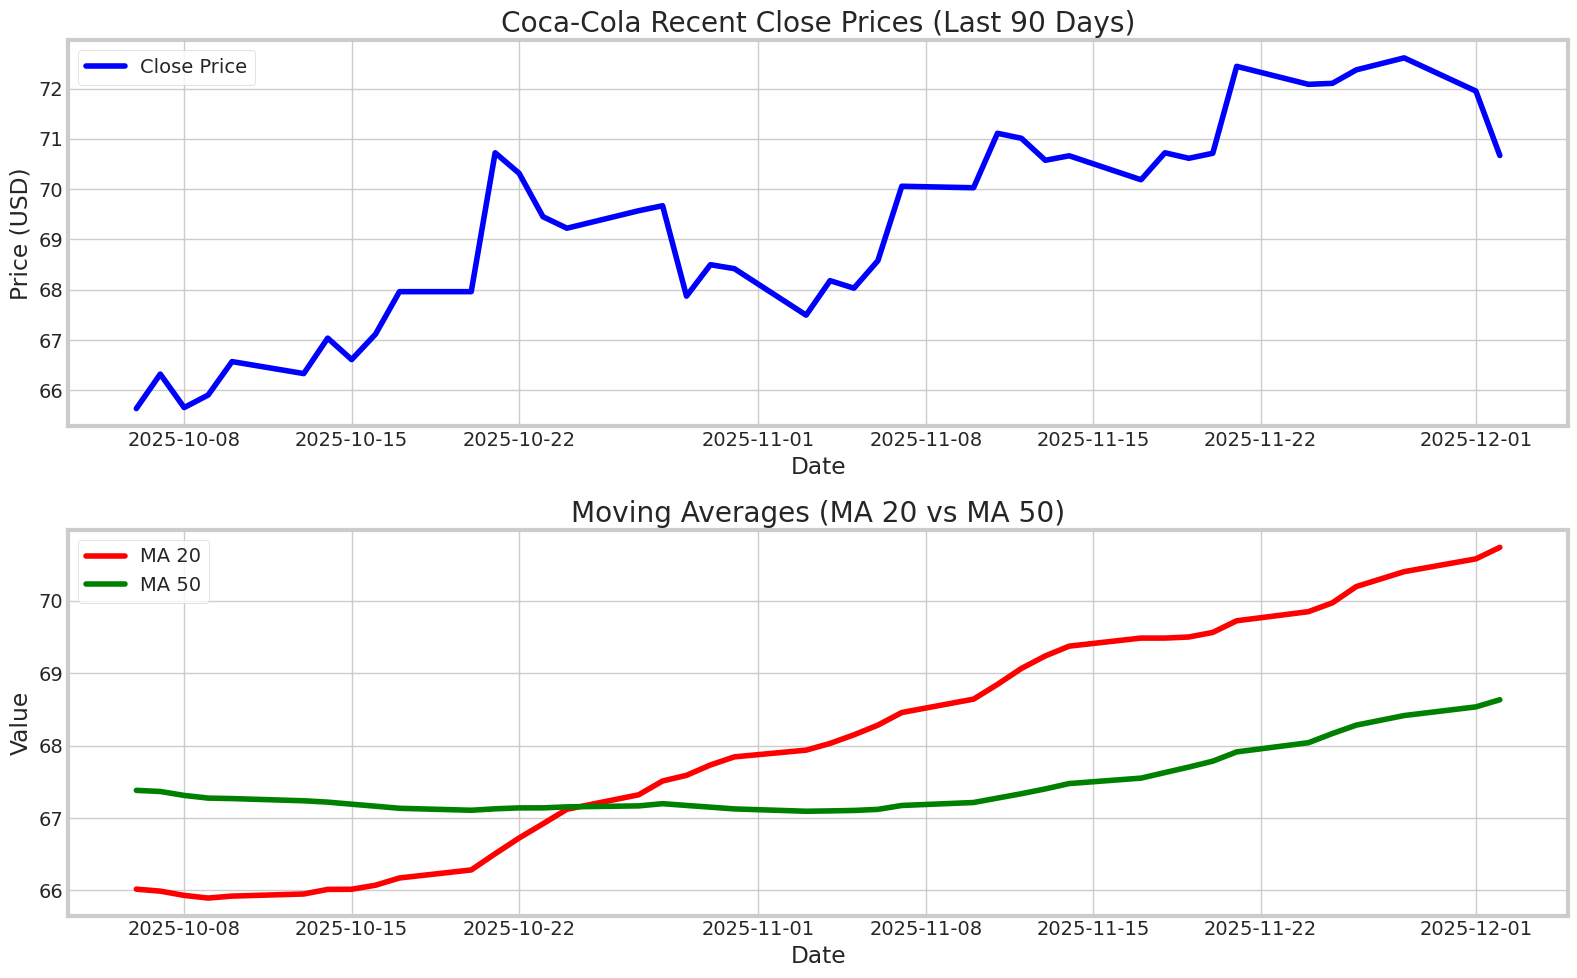

=== LIVE STOCK PREDICTION DASHBOARD ===
Today's Open:        $71.80
Today's High:        $71.80
Today's Low:         $70.43
Today's Volume:      19863200
------------------------------------------
Predicted Close Price Today:  $54.56


In [66]:
import matplotlib.pyplot as plt

# Create dashboard layout
plt.figure(figsize=(16,10))

# ---- Plot 1: Recent Close Price ----
plt.subplot(2,1,1)
plt.plot(dashboard_data.index, dashboard_data['Close'], label="Close Price", color='blue')
plt.title("Coca-Cola Recent Close Prices (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

# ---- Plot 2: MA20 & MA50 ----
plt.subplot(2,1,2)
plt.plot(dashboard_data.index, dashboard_data['MA_20'], label="MA 20", color='red')
plt.plot(dashboard_data.index, dashboard_data['MA_50'], label="MA 50", color='green')
plt.title("Moving Averages (MA 20 vs MA 50)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()

# ---- Display Live Prediction Panel ----
print("=== LIVE STOCK PREDICTION DASHBOARD ===")
print(f"Today's Open:        ${float(latest_dash['Open']):.2f}")
print(f"Today's High:        ${float(latest_dash['High']):.2f}")
print(f"Today's Low:         ${float(latest_dash['Low']):.2f}")
print(f"Today's Volume:      {int(latest_dash['Volume'])}")
print("------------------------------------------")
print(f"Predicted Close Price Today:  ${predicted_live_price:.2f}")
print("==========================================")
